# Задание 2. Jupiter

## 1. ТЗ


1. Проверить датасет на: дубликаты, пропуски, типы данных, аномальные значения. Произвести предобработку датасета, если это необходимо 
<br><br>
2. Поделить всех учеников на волны:
- 0 волна – присоединились на курс до даты старта курса включительно
- 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно
- 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса
- 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса
- 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса
- 5 волна - присоединились на курс от 4 недель после даты старта курса

## 2. Загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import date
import warnings
warnings.filterwarnings("ignore")
# импорт библиотек

In [2]:
# загрузка данных
users = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/users.csv')
course_users = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/course_users.csv')
courses = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/courses.csv')
course_types = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/course_types.csv')
lessons = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/lessons.csv')
subjects = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/subjects.csv')
cities = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/cities.csv')
homework_done = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/homework_done.csv')
homework = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/homework.csv')
homework_lessons = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/homework_lessons.csv')
user_roles = pd.read_csv('/Users/dmitriy/Downloads/Тестовое задание/Файлы/user_roles.csv')

In [3]:
# функция для просмотра общей информации
def get_info(data):
    display(data.head(10)) # отображение первых 10 строчек датафрейма
    print()
    print('-----------Общая инфоормация-----------')
    print(data.info()) # общая информация - пропуски, типы данных, количество значений, названия столбцов
    print()
    print('----------Проверка на дубликаты-----------')
    print('Количество явных дубликатов -', data.duplicated().sum()) # сумма явных дубликатов
    print()
    print('------------Описание данных--------------')
    print(data.describe()) 
    # числовое описание информации, может помочь обнаружить выбросы по медианным, минимальным и максимальным значениям

### Датафрейм users

In [4]:
get_info(users) # использую функцию

,id,last_name,user_role_id,gender,coins,city_id,created_at,updated_at
0,10001,Markova,5,NaN,880,784.0,2024-07-25 17:51:42,2024-11-09 18:26:55
1,10002,Коваленко,5,NaN,160,508.0,2024-07-25 17:55:38,2024-10-19 18:28:46
2,10003,Драгомирецкий,5,NaN,200,NaN,2024-07-25 18:30:01,2024-09-25 07:35:22
3,10004,Поцелуева,5,NaN,0,391.0,2024-07-25 18:31:31,2024-07-25 18:42:50
4,10005,Гусев,5,NaN,0,66.0,2024-07-25 18:41:44,2024-09-22 16:38:21
5,10006,Пушкина,5,NaN,910,508.0,2024-07-25 18:44:50,2024-11-08 17:28:45
6,10007,Бажина,5,NaN,0,866.0,2024-07-25 20:02:19,2024-07-25 20:04:05
7,10008,Хаджиякубова,5,NaN,0,899.0,2024-07-25 22:27:19,2024-07-25 22:30:02
8,10009,Чернобель,5,NaN,780,909.0,2024-07-26 05:45:27,2024-11-06 17:19:07
9,10010,Мирзоян,5,NaN,1820,1106.0,2024-07-26 07:42:56,2024-11-10 03:19:44



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4906 non-null   int64  
 1   last_name     4906 non-null   object 
 2   user_role_id  4906 non-null   int64  
 3   gender        0 non-null      float64
 4   coins         4906 non-null   int64  
 5   city_id       3934 non-null   float64
 6   created_at    4906 non-null   object 
 7   updated_at    4906 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 306.8+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
                 id  user_role_id  gender         coins      city_id
count   4906.000000   4906.000000     0.0   4906.000000  3934.000000
mean   25711.262740      5.056869     NaN    468.247044   588.310117
std     8036.133344      0.3

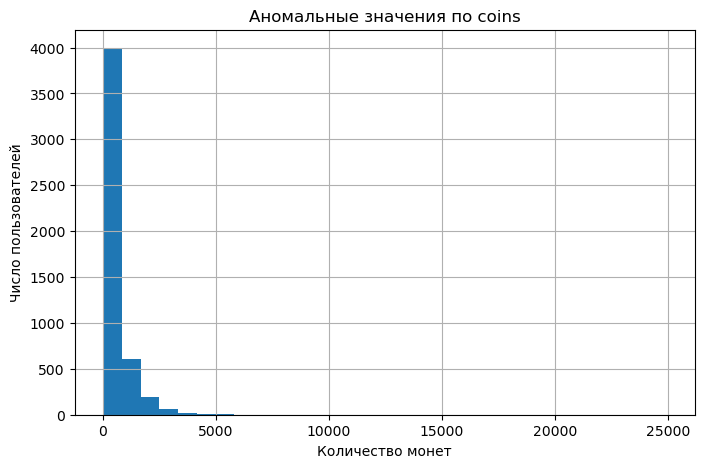

In [5]:
users['coins'].hist(figsize=(8, 5), bins=30) # проверка на выбросы, исходя из информации в describe
plt.title('Аномальные значения по coins')
plt.xlabel('Количество монет')
plt.ylabel('Число пользователей')
plt.show()

По итогам проверки датафрейма users:
- 4906 значений
- дубликатов нет
- пропуски есть в столбце gender. Он пропущен полностью, возможно из-за неверного типа данных (сейчас float)
- также, пропуски есть в столбце city_id. Мы не можем узнать, в каком городе находится ученик, а удалять строки с пропусками в ID города нецелесообразно. Нужно заполнить значениями -1
- столбцы gender и city_id нуждаются в изменении типа данных (gender на object - чтобы заполнять М/Ж, а city_id на int)
- created_at и updated_at нуждается в замене типа данных на тип даты и времени
- аномальные значения наблюдаются в столбце coins. Медианное значение количества монет - 468, а максимальное - 24930. Из графика видно, что в основном, у пользователей, до 5000 монет - далее выбросы


In [6]:
users['gender'] = users['gender'].astype(object) # изменение типа данных 
users['city_id'] = users['city_id'].fillna('-1') # заполнение пропусков на -1
users['city_id'] = users['city_id'].astype(int) # изменение на целые числа
users['created_at'] = pd.to_datetime(users['created_at']) # изменение на формат даты и времени
users['updated_at'] = pd.to_datetime(users['updated_at'])
users.dtypes

id                       int64
last_name               object
user_role_id             int64
gender                  object
coins                    int64
city_id                  int64
created_at      datetime64[ns]
updated_at      datetime64[ns]
dtype: object

In [7]:
users = users.query('coins <= 5000') # отсекание выбросов

In [8]:
users.shape[0] # проверка объема данных

4892

<div class='alert alert-info'>
Датафрейм users обработан. После предобработки количество записей сократилось с 4906 до 4892, что составляет менее 5% от общего количества записей

### Датафрейм course_users

In [9]:
get_info(course_users)

,id,user_id,course_id,active,available_lessons,created_at,updated_at
0,69904,10001,29,0,NaN,2024-07-25 18:04:19,2024-07-25 18:04:19
1,69908,10001,33,0,NaN,2024-07-25 18:04:20,2024-07-25 18:04:20
2,69910,10001,16,1,20.0,2024-07-25 18:04:20,2024-10-16 15:21:34
3,69911,10001,19,1,18.0,2024-07-25 18:04:20,2024-10-22 17:06:53
4,78748,10001,40,1,30.0,2024-08-05 12:14:09,2024-08-05 12:14:09
5,133133,10001,24,1,20.0,2024-09-01 07:49:22,2024-10-22 17:08:03
6,337128,10001,101,1,NaN,2024-11-03 14:43:47,2024-11-03 14:43:47
7,69915,10002,29,0,NaN,2024-07-25 18:07:04,2024-07-25 18:07:04
8,69919,10002,33,0,NaN,2024-07-25 18:07:04,2024-07-25 18:07:04
9,69921,10002,19,0,12.0,2024-07-25 18:07:04,2024-10-30 18:20:50



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15347 entries, 0 to 15346
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15347 non-null  int64  
 1   user_id            15347 non-null  int64  
 2   course_id          15347 non-null  int64  
 3   active             15347 non-null  int64  
 4   available_lessons  6370 non-null   float64
 5   created_at         15347 non-null  object 
 6   updated_at         15347 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 839.4+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
                  id       user_id     course_id        active  \
count   15347.000000  15347.000000  15347.000000  15347.000000   
mean   240238.066267  22858.011207     51.842771      0.779762   
std     96861.467269   9000.64530

- дубликатов не обнаружено
- пропуски есть только в столбце доступных уроков. Значение 0 в этом столбце есть. Заполним также -1
- тип данных available_lessons поменять на int
- active нужно поменять с int на bool
- created_at и updated_at с object на datetime

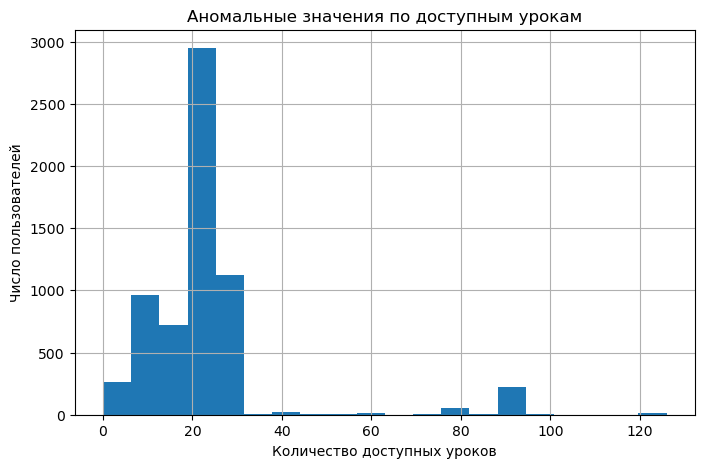

In [10]:
course_users['available_lessons'].hist(figsize=(8, 5), bins=20)
plt.title('Аномальные значения по доступным урокам')
plt.xlabel('Количество доступных уроков')
plt.ylabel('Число пользователей')
plt.show()

За аномальные значения можно взять пользователей, у которых больше 40 открытых уроков

In [11]:
course_users['available_lessons'] = course_users['available_lessons'].fillna(-1)
course_users['available_lessons'] = course_users['available_lessons'].astype('int')
course_users['active'] = course_users['active'].astype('bool') # изменение типа данных к булевому
course_users['updated_at'] = pd.to_datetime(course_users['updated_at'])
course_users['created_at'] = pd.to_datetime(course_users['created_at'])
course_users.dtypes # проверка типов данных

id                            int64
user_id                       int64
course_id                     int64
active                         bool
available_lessons             int64
created_at           datetime64[ns]
updated_at           datetime64[ns]
dtype: object

In [12]:
course_users = course_users.query('available_lessons <= 40') # отсекание выбросов и проверка объема данных
course_users.shape[0]

14999

<div class='alert alert-info'>
Датафрейм course_users обработан. После обработки количество строк сократилось с 15347 до 14999, что составляет менее 5% от общего объема 

### Датафрейм courses

In [13]:
get_info(courses)

,id,name,cost,referral_is_open,subject_id,lessons_in_month,course_type_id,starts_at,created_at,updated_at
0,16,Годовой 2к25 стандарт,4590,1,1,10,1,2024-09-16,2024-05-07 09:16:48,2024-10-21 16:05:07
1,17,Годовой 2к25 стандарт,4590,1,2,10,1,2024-09-20,2024-05-07 09:19:16,2024-10-18 17:44:49
2,18,Годовой 2к25 стандарт,4590,1,3,10,1,2024-09-18,2024-05-07 09:24:04,2024-10-18 17:44:54
3,19,Годовой 2к25 стандарт,4290,1,4,9,1,2024-09-21,2024-05-07 09:24:47,2024-10-18 17:44:58
4,20,Годовой 2к25 стандарт,4590,1,5,10,1,2024-09-16,2024-05-07 09:25:25,2024-10-18 17:45:03
5,21,Годовой 2к25 стандарт,4590,1,6,10,1,2024-09-16,2024-05-07 09:26:11,2024-10-18 17:45:16
6,22,Годовой 2к25 стандарт,4590,1,7,10,1,2024-09-17,2024-05-07 09:28:49,2024-10-18 17:45:19
7,23,Годовой 2К25 стандарт с Машей,4590,1,8,10,1,2024-09-20,2024-05-07 10:19:41,2024-10-18 17:45:24
8,24,В погоне за пятеркой 2К25 стандарт,4590,1,9,10,1,2024-09-17,2024-05-07 10:23:28,2024-11-02 15:24:34
9,25,Годовой 2к25 стандарт,4590,1,10,14,1,2024-09-17,2024-05-08 12:34:05,2024-10-18 17:45:28



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                82 non-null     int64 
 1   name              82 non-null     object
 2   cost              82 non-null     int64 
 3   referral_is_open  82 non-null     int64 
 4   subject_id        82 non-null     int64 
 5   lessons_in_month  82 non-null     int64 
 6   course_type_id    82 non-null     int64 
 7   starts_at         82 non-null     object
 8   created_at        82 non-null     object
 9   updated_at        82 non-null     object
dtypes: int64(6), object(4)
memory usage: 6.5+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
               id           cost  referral_is_open  subject_id  \
count   82.000000      82.000000         82.000000   82.000000  

In [14]:
courses.sort_values(by='cost', ascending=False).head()

,id,name,cost,referral_is_open,subject_id,lessons_in_month,course_type_id,starts_at,created_at,updated_at
76,99,Тестовый курс,888888,1,1,10,1,2024-10-24,2024-10-24 18:21:32,2024-10-24 18:21:32
52,73,Годовой курс 2к25 комбо (биология + русский + ...,9900,0,12,10,1,2024-09-22,2024-09-22 10:10:53,2024-09-22 10:30:36
23,39,Годовой курс 2к25 комбо (русский + обществозна...,9900,1,11,10,1,2024-09-15,2024-06-21 17:05:05,2024-09-23 13:37:31
53,74,Годовой курс 2к25 комбо (биология + обществозн...,9900,0,11,10,1,2024-09-22,2024-09-22 10:13:45,2024-09-22 10:30:30
41,57,Годовой 2к25 платинум,6890,1,2,10,1,2024-09-20,2024-09-04 08:50:43,2024-10-18 11:54:17


- нужно изменить тип данных: referral_is_open на bool, starts_at, created_at, updated_at на формат даты.
- дубликатов не обнаружено, пропусков нет
- есть одно выбивающееся значение - тестовый курс. Для анализа он не идет, значит его можно удалить, как аномалию

In [15]:
courses['referral_is_open'] = courses['referral_is_open'].astype('bool')
courses['starts_at'] = pd.to_datetime(courses['starts_at'])
courses['created_at'] = pd.to_datetime(courses['created_at'])
courses['updated_at'] = pd.to_datetime(courses['updated_at'])
courses.dtypes

id                           int64
name                        object
cost                         int64
referral_is_open              bool
subject_id                   int64
lessons_in_month             int64
course_type_id               int64
starts_at           datetime64[ns]
created_at          datetime64[ns]
updated_at          datetime64[ns]
dtype: object

In [16]:
courses = courses.query('name != "Тестовый курс"')

<div class='alert alert-info'>
Датафрейм courses обработан.

### Датафрейм course_types

In [17]:
get_info(course_types)

,id,name
0,1,Годовой
1,2,Полугодовой
2,3,Спецкурс
3,4,Марафон
4,5,Прочий
5,6,Годовой 2.0



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
             id
count  6.000000
mean   3.500000
std    1.870829
min    1.000000
25%    2.250000
50%    3.500000
75%    4.750000
max    6.000000


<div class='alert alert-info'>
Датафрейм course_types не нуждается в обработке

### Датафрейм lessons

In [18]:
get_info(lessons)

,id,topic,date,course_id,created_at,updated_at
0,6,Добро пожаловать),2024-06-24 13:00:00,26,2024-06-17 15:43:52,2024-08-24 13:38:25
1,8,ЧТО ТАКОЕ ЕГЭ ПО АНГЛИЙСКОМУ?,2024-06-21 13:00:00,27,2024-06-17 15:51:26,2024-08-24 13:45:19
2,9,Я — ГЕНИЙ ИСТОРИИ,2024-06-22 13:00:00,28,2024-06-17 15:52:51,2024-08-24 13:50:05
3,10,"Это база, так сказать, основа, base.",2024-06-21 13:00:00,29,2024-06-17 15:54:18,2024-08-24 13:53:45
4,11,Что это за слово??,2024-06-23 07:00:00,30,2024-06-17 15:55:30,2024-09-15 10:24:04
5,12,"На старт, внимание, подготовка!",2024-06-21 07:00:00,31,2024-06-17 15:56:47,2024-09-11 19:48:03
6,13,БУДУЩИЕ ЛИТЕРАТУРНЫЕ ГЕНИИ,2024-06-22 13:00:00,32,2024-06-17 16:00:15,2024-08-24 13:36:13
7,14,ЧТО? ГДЕ? КОГДА?,2024-06-18 13:00:00,33,2024-06-17 16:01:15,2024-08-24 13:39:24
8,16,"Экономика, привет)",2024-07-02 13:00:00,26,2024-06-18 08:19:03,2024-06-19 16:28:40
9,17,Урок по решению 24 задания (планы),2024-07-08 13:00:00,26,2024-06-18 08:20:01,2024-07-18 12:09:24



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1157 non-null   int64 
 1   topic       1157 non-null   object
 2   date        1157 non-null   object
 3   course_id   1157 non-null   int64 
 4   created_at  1157 non-null   object
 5   updated_at  1157 non-null   object
dtypes: int64(2), object(4)
memory usage: 54.4+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
                id    course_id
count  1157.000000  1157.000000
mean    653.502161    52.438202
std     371.516437    25.540673
min       6.000000    16.000000
25%     324.000000    26.000000
50%     668.000000    56.000000
75%     981.000000    79.000000
max    1274.000000   104.000000


- нужно перевести типы данных в столбцах date, created_at, updated_at на datetime
- пропусков, дубликатов и аномалий нет

In [19]:
lessons['date'] = pd.to_datetime(lessons['date'])
lessons['created_at'] = pd.to_datetime(lessons['created_at'])
lessons['updated_at'] = pd.to_datetime(lessons['updated_at'])
lessons.dtypes

id                     int64
topic                 object
date          datetime64[ns]
course_id              int64
created_at    datetime64[ns]
updated_at    datetime64[ns]
dtype: object

<div class='alert alert-info'>
Датафрейм lessons обработан.

### Датафрейм subjects

In [20]:
get_info(subjects)

,id,name,project,created_at,updated_at
0,1,Обществознание,ЕГЭ,2024-04-10 10:28:33,2024-10-01 13:53:11
1,2,Английский язык,ЕГЭ,2024-04-10 10:29:48,2024-09-23 15:00:07
2,3,История,ЕГЭ,2024-04-10 10:41:31,2024-08-15 09:08:01
3,4,Русский,ЕГЭ,2024-04-10 10:43:29,2024-09-23 15:00:25
4,5,Физика,ЕГЭ,2024-04-10 10:44:27,2024-08-15 09:07:29
5,6,Химия,ЕГЭ,2024-04-10 10:45:41,2024-08-15 09:06:47
6,7,Литература,ЕГЭ,2024-04-10 10:46:22,2024-08-15 09:03:57
7,8,Математика,ЕГЭ,2024-04-10 10:48:02,2024-08-15 09:04:36
8,9,Математика (база),ЕГЭ,2024-04-10 10:48:36,2024-08-15 09:06:13
9,10,Биология,ЕГЭ,2024-05-08 12:30:05,2024-08-15 09:03:20



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          14 non-null     int64 
 1   name        14 non-null     object
 2   project     14 non-null     object
 3   created_at  14 non-null     object
 4   updated_at  14 non-null     object
dtypes: int64(1), object(4)
memory usage: 692.0+ bytes
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
              id
count  14.000000
mean    7.571429
std     4.309458
min     1.000000
25%     4.250000
50%     7.500000
75%    10.750000
max    15.000000


- created_at и updated_at нужно привести к datetime

In [21]:
subjects['created_at'] = pd.to_datetime(subjects['created_at'])
subjects['updated_at'] = pd.to_datetime(subjects['updated_at'])
subjects.dtypes

id                     int64
name                  object
project               object
created_at    datetime64[ns]
updated_at    datetime64[ns]
dtype: object

<div class='alert alert-info'>
Датафрейм subjects обработан

### Датафрейм cities

In [22]:
get_info(cities)

,id,name,region_id,created_at,updated_at
0,1,Адыгейск,1,NaN,NaN
1,2,Майкоп,1,NaN,NaN
2,3,Горно-Алтайск,3,NaN,NaN
3,4,Алейск,3,NaN,NaN
4,5,Барнаул,3,NaN,NaN
5,6,Белокуриха,3,NaN,NaN
6,7,Бийск,3,NaN,NaN
7,8,Горняк,3,NaN,NaN
8,9,Заринск,3,NaN,NaN
9,10,Змеиногорск,3,NaN,NaN



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1238 non-null   int64  
 1   name        1238 non-null   object 
 2   region_id   1238 non-null   int64  
 3   created_at  0 non-null      float64
 4   updated_at  0 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 48.5+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
               id    region_id  created_at  updated_at
count  1238.00000  1238.000000         0.0         0.0
mean    621.92084    47.585622         NaN         NaN
std     359.17692    25.566380         NaN         NaN
min       1.00000     1.000000         NaN         NaN
25%     310.25000    27.250000         NaN         NaN
50%     623.50000    47.000000         NaN       

- cтолбцы created_at и updated_at можно удалить, они полностью пропущены
- дубликатов нет, аномалий нет

In [23]:
cities = cities.drop(['created_at', 'updated_at'], axis=1)
cities.head()

,id,name,region_id
0,1,Адыгейск,1
1,2,Майкоп,1
2,3,Горно-Алтайск,3
3,4,Алейск,3
4,5,Барнаул,3


<div class='alert alert-info'>
Датафрейм cities обработан.

### Датафрейм homework_done

In [24]:
get_info(homework_done)

,id,user_id,homework_id,mark,created_at,updated_at
0,6298,10001,282,100.00,2024-09-17 15:37:22,2024-09-18 12:47:33
1,6676,10001,279,NaN,2024-09-17 16:07:04,2024-09-17 16:07:05
2,10136,10001,257,100.00,2024-09-18 10:30:34,2024-09-18 12:19:51
3,31343,10001,322,30.44,2024-09-21 16:00:13,2024-09-26 14:14:57
4,31855,10001,281,NaN,2024-09-21 17:01:40,2024-09-21 17:01:40
5,31963,10001,302,100.00,2024-09-21 17:17:11,2024-09-25 12:57:51
6,32269,10001,314,NaN,2024-09-21 18:04:07,2024-09-21 18:04:07
7,65387,10001,378,53.24,2024-09-26 12:51:06,2024-09-30 17:56:41
8,88252,10001,303,3.50,2024-09-29 14:47:55,2024-11-09 04:44:15
9,205135,10001,422,39.38,2024-10-13 17:56:01,2024-10-27 19:52:37



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58400 entries, 0 to 58399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           58400 non-null  int64  
 1   user_id      58400 non-null  int64  
 2   homework_id  58400 non-null  int64  
 3   mark         51172 non-null  float64
 4   created_at   58400 non-null  object 
 5   updated_at   58400 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.7+ MB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
                  id       user_id   homework_id          mark
count   58400.000000  58400.000000  58400.000000  51172.000000
mean   242127.277089  23623.720325    497.723801     65.955660
std    124991.320010   8771.354660    157.431714     27.375864
min        25.000000  10001.000000     40.000000      0.000000
25%    138742.

- в смене типа данных нуждаются только created_at и updated_at
- дубликатов, аномалий нет
- пропуски наблюдаются в колонке mark, что может говорить о том, что работа сдана, но еще не проверена преподавателем. Заполним ее, как -1, чтобы при дальнейшем анализе оценок поставить фильтр от 0

In [25]:
homework_done['created_at'] = pd.to_datetime(homework_done['created_at'])
homework_done['updated_at'] = pd.to_datetime(homework_done['updated_at'])
homework_done['mark'] = homework_done['mark'].fillna(-1)
homework_done.dtypes

id                      int64
user_id                 int64
homework_id             int64
mark                  float64
created_at     datetime64[ns]
updated_at     datetime64[ns]
dtype: object

<div class='alert alert-info'>
Датафрейм homework_done обработан.

### Датафрейм homework

In [26]:
get_info(homework)

,id,deadline,homework_type_id,created_at,updated_at
0,14,2024-07-05 15:00:00,NaN,2024-06-21 15:34:35,2024-06-21 15:34:35
1,16,2024-07-01 13:00:00,NaN,2024-06-21 17:18:56,2024-06-21 17:18:56
2,17,2024-06-25 13:00:00,NaN,2024-06-21 17:21:35,2024-06-21 17:21:35
3,18,2024-06-24 13:00:00,NaN,2024-06-21 17:34:48,2024-06-21 17:34:48
4,19,2024-06-29 13:00:00,NaN,2024-06-22 12:50:25,2024-06-22 12:50:25
5,21,2024-06-29 13:00:00,NaN,2024-06-22 18:30:20,2024-06-22 18:30:20
6,22,2024-07-01 13:00:00,NaN,2024-06-23 12:59:23,2024-06-23 12:59:23
7,23,2024-07-01 13:00:00,NaN,2024-06-24 14:37:45,2024-06-24 14:37:45
8,24,2024-07-02 13:00:00,NaN,2024-06-25 13:00:06,2024-06-25 13:00:06
9,26,2024-07-06 13:00:00,NaN,2024-06-28 12:42:12,2024-06-28 12:42:12



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                673 non-null    int64  
 1   deadline          673 non-null    object 
 2   homework_type_id  645 non-null    float64
 3   created_at        673 non-null    object 
 4   updated_at        673 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 26.4+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
               id  homework_type_id
count  673.000000        645.000000
mean   441.120357         63.696124
std    244.188919         47.809249
min     14.000000         11.000000
25%    215.000000         21.000000
50%    454.000000         40.000000
75%    654.000000        113.000000
max    843.000000        156.000000


In [27]:
homework['homework_type_id'].unique()

array([ nan, 120.,  18.,  16.,  15.,  12.,  17.,  19.,  11.,  27., 115.,
        25.,  26.,  13., 128.,  40.,  42., 126., 112., 110.,  44.,  46.,
        45., 119., 125.,  21., 130., 142., 124., 113., 116., 131., 144.,
       137., 135., 103., 145.,  47.,  29.,  43., 127.,  51., 146.,  38.,
       123.,  39., 143.,  28.,  30.,  24.,  54.,  59., 132.,  22., 141.,
        23., 149., 133., 111.,  31., 104., 114., 150.,  55.,  71., 151.,
        32.,  62., 152.,  74., 153., 155., 156.,  49.])

- тип данных сменить на datetime в колонках created_at, updated_at. На int в homework_type_id
- пропуски в homework type_id можно удалить
- дубликатов, аномалий нет

In [28]:
homework['created_at'] = pd.to_datetime(homework['created_at'])
homework['updated_at'] = pd.to_datetime(homework['updated_at'])
homework = homework.dropna()
homework['homework_type_id'] = homework['homework_type_id'].astype('int')
homework.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 17 to 672
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                645 non-null    int64         
 1   deadline          645 non-null    object        
 2   homework_type_id  645 non-null    int64         
 3   created_at        645 non-null    datetime64[ns]
 4   updated_at        645 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 30.2+ KB


<div class='alert alert-info'>
Датафрейм homework обработан. Количество строк после обработки сократилось до 645 с 673, данные актуальны

### Датафрейм homework_lessons

In [29]:
get_info(homework_lessons)

,id,homework_id,lesson_id,created_at,updated_at
0,5,40,6,2024-08-03 11:59:33,2024-08-03 11:59:33
1,7,42,14,2024-08-03 12:18:14,2024-08-03 12:18:14
2,8,43,8,2024-08-03 12:20:58,2024-08-03 12:20:58
3,10,45,12,2024-08-03 12:29:23,2024-08-03 12:29:23
4,11,46,9,2024-08-03 12:38:56,2024-08-03 12:38:56
5,12,47,11,2024-08-03 12:43:45,2024-08-03 12:43:45
6,13,48,13,2024-08-03 12:45:47,2024-08-03 12:45:47
7,14,49,94,2024-08-03 14:06:06,2024-08-03 14:06:06
8,15,50,94,2024-08-03 14:07:31,2024-08-03 14:07:31
9,16,51,94,2024-08-03 14:09:11,2024-08-03 14:09:11



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           814 non-null    int64 
 1   homework_id  814 non-null    int64 
 2   lesson_id    814 non-null    int64 
 3   created_at   814 non-null    object
 4   updated_at   814 non-null    object
dtypes: int64(3), object(2)
memory usage: 31.9+ KB
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
                id  homework_id    lesson_id
count   814.000000   814.000000   814.000000
mean    521.287469   483.213759   452.087224
std     298.131691   235.818140   263.220682
min       5.000000    40.000000     6.000000
25%     260.250000   283.750000   235.250000
50%     530.500000   505.000000   428.000000
75%     783.750000   687.750000   674.750000
max    1012.000000   843.000000  

- дубликатов, пропущенных значений не найдено
- created_at, updated_at привести к datetime

In [30]:
homework_lessons['created_at'] = pd.to_datetime(homework_lessons['created_at'])
homework_lessons['updated_at'] = pd.to_datetime(homework_lessons['updated_at'])
homework_lessons.dtypes

id                      int64
homework_id             int64
lesson_id               int64
created_at     datetime64[ns]
updated_at     datetime64[ns]
dtype: object

<div class='alert alert-info'>
Датафрейм homework_lessons обработан.

### Датафрейм user_roles

In [31]:
get_info(user_roles)

,id,name
0,1,super_admin
1,2,admin
2,3,editor
3,4,teacher
4,5,student
5,6,mentor
6,7,guest
7,8,moder
8,9,ron
9,10,methodist



-----------Общая инфоормация-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13 non-null     int64 
 1   name    13 non-null     object
dtypes: int64(1), object(1)
memory usage: 340.0+ bytes
None

----------Проверка на дубликаты-----------
Количество явных дубликатов - 0

------------Описание данных--------------
             id
count  13.00000
mean    7.00000
std     3.89444
min     1.00000
25%     4.00000
50%     7.00000
75%    10.00000
max    13.00000


<div class='alert alert-info'>
Датафрейму не требуется обработка.

## 3. Деление на волны

Для деления на волны, нужно будет соединить датафреймы courses, course_users

In [32]:
data = courses.merge(course_users, left_on='id', right_on='course_id') # слияние двух датафреймов 
data = data.drop(['name', 'cost', 'referral_is_open', 'subject_id', 'lessons_in_month',
          'course_type_id', 'active', 'available_lessons', 'id_x',
                 'created_at_x', 'updated_at_x', 'id_y', 'updated_at_y'], axis=1) # эти столбцы не будут нужны
data.columns = ['course_start', 'user_id', 'course_id', 'user_signed'] # переименовал для удобства
# оставляем столбцы с датой начала курса, ID ученика и курса и датой регистрации на курс
data.head() # проверка

,course_start,user_id,course_id,user_signed
0,2024-09-16,10001,16,2024-07-25 18:04:20
1,2024-09-16,10006,16,2024-07-25 18:48:31
2,2024-09-16,10009,16,2024-07-26 06:05:09
3,2024-09-16,10010,16,2024-07-26 11:35:32
4,2024-09-16,10011,16,2024-07-26 10:26:56


In [33]:
data['user_signed'] = data['user_signed'].dt.normalize() # оставляю только дату
data['days_gone'] = data['user_signed'] - data['course_start'] # сколько дней прошло
data['days_gone'] = data['days_gone'].dt.days # приведение к int
data['waves'] = {} # создание столбца с волнами

- **0 волна** - зарегистрировался до начала курса, либо в день старта курса
- **1 волна** - зарегистрировался в первую неделю после начала курса
- **2 волна** - зарегистрировался во вторую неделю после начала курса
- **3 волна** - зарегистрировался в третью неделю после старта курса
- **4 волна** - зарегистрировался в четвертую неделю после старта курса
- **5 волна** - присоединился от четырех недель после старта курса

In [34]:
for i in range(len(data)): # цикл
    if data['days_gone'][i] <= 0:
        data['waves'][i] = 0
    elif data['days_gone'][i] >= 1 and data['days_gone'][i] <= 7:
        data['waves'][i] = 1
    elif data['days_gone'][i] >= 8 and data['days_gone'][i] <= 14:
        data['waves'][i] = 2
    elif data['days_gone'][i] >= 15 and data['days_gone'][i] <= 21:
        data['waves'][i] = 3
    elif data['days_gone'][i] >= 22 and data['days_gone'][i] <= 28:
        data['waves'][i] = 4
    else: 
        data['waves'][i] = 5
data['waves'] = data['waves'].astype(int) # приведение к целым числам

In [35]:
data.head(15) # проверка

,course_start,user_id,course_id,user_signed,days_gone,waves
0,2024-09-16,10001,16,2024-07-25,-53,0
1,2024-09-16,10006,16,2024-07-25,-53,0
2,2024-09-16,10009,16,2024-07-26,-52,0
3,2024-09-16,10010,16,2024-07-26,-52,0
4,2024-09-16,10011,16,2024-07-26,-52,0
5,2024-09-16,10014,16,2024-07-26,-52,0
6,2024-09-16,10016,16,2024-07-26,-52,0
7,2024-09-16,10017,16,2024-07-26,-52,0
8,2024-09-16,10018,16,2024-07-26,-52,0
9,2024-09-16,10019,16,2024-07-26,-52,0


In [36]:
data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   course_start  14999 non-null  datetime64[ns]
 1   user_id       14999 non-null  int64         
 2   course_id     14999 non-null  int64         
 3   user_signed   14999 non-null  datetime64[ns]
 4   days_gone     14999 non-null  int64         
 5   waves         14999 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 703.2 KB


<div class="alert alert-success">
    
- Датафрейм data можно объединить слиянием merge с объединенными датафреймами courses и users, либо с датафреймом course_users. 
- В data доступна информация обо всех учениках и связанных с ними курсах, все ученики поделены на 6 волн в зависимости от курса, который они проходят
- data можно объединять со столбцами из других датафреймов по колонкам user_id (например, узнать фамилию ученика и город его проживания) или course_id (узнать название и направление подготовки курса)
- в data указаны: время старта курса, время регистрации на курс и разница между регистрацией и началом курса
</div>